<a href="https://colab.research.google.com/github/kimsangho611/DeepLearningZeroToAll-Practice/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.4.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.4.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.0


In [3]:
!pip install tensorflow==1.15 # 1.15 버전 Tensorflow 설치

     |████████████████████████████████| 412.3MB 35kB/s 
     |████████████████████████████████| 512kB 48.7MB/s 
     |████████████████████████████████| 3.8MB 45.2MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ffc7c760308db707fc1ebab090a57a6ec2bd879b7cb7b7aa649d7b30a8e9a945
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

# Hello TensorFlow!

In [2]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, Tensorflow!")

# start a TF session
sess = tf.Session()

# run the op and get result
print(sess.run(hello)) # b' is indicates bytes literals

b'Hello, Tensorflow!'


# Tensors Shape

In [ ]:
a = 3 # a rank 0 tensor : this is a scalar with shape []
b = [1., 2., 3.] # rank 1 [3]
c = [[1., 2., 3.], [4., 5., 6.]] # rank 2 (2,3)
d = [[[1., 2., 3.]], [[7., 8., 9.]]] # rank 3 (2, 1, 3)

print("the shape of a : ", tf.shape(a))
print("the shape of b : ", tf.shape(b))
print("the shape of c : ", tf.shape(c))
print("the shape of d : ", tf.shape(d))

the shape of a :  Tensor("Shape_1:0", shape=(0,), dtype=int32)
the shape of b :  Tensor("Shape_2:0", shape=(1,), dtype=int32)
the shape of c :  Tensor("Shape_3:0", shape=(2,), dtype=int32)
the shape of d :  Tensor("Shape_4:0", shape=(3,), dtype=int32)


# Comoutational Graph

In [ ]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

In [ ]:
print("node1 : ", node1, "node2 : ", node2) # 그래프의 한 요소임을 알려줌
print("node3 : ", node3)

node1 :  Tensor("Const_6:0", shape=(), dtype=float32) node2 :  Tensor("Const_7:0", shape=(), dtype=float32)
node3 :  Tensor("Add_3:0", shape=(), dtype=float32)


In [ ]:
sess = tf.Session() # node를 실행하기 위해서 
print("sess.run(node1, node2) : ", sess.run([node1, node2]))
print("sess.run(node3) : ", sess.run(node3))

sess.run(node1, node2) :  [3.0, 4.0]
sess.run(node3) :  7.0


# PlaceHolder

In [ ]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provide a shortcut for tf.add(a,b)

print(sess.run(adder_node, feed_dict = {a:3, b:4.5}))
print(sess.run(adder_node, feed_dict = {a: [1, 3], b: [2,4]}))

7.5
[3. 7.]


In [ ]:
add_and_triple = adder_node * 3
print(sess.run(add_and_triple, feed_dict={a:3, b:4.5}))

22.5


=======================================================================================================

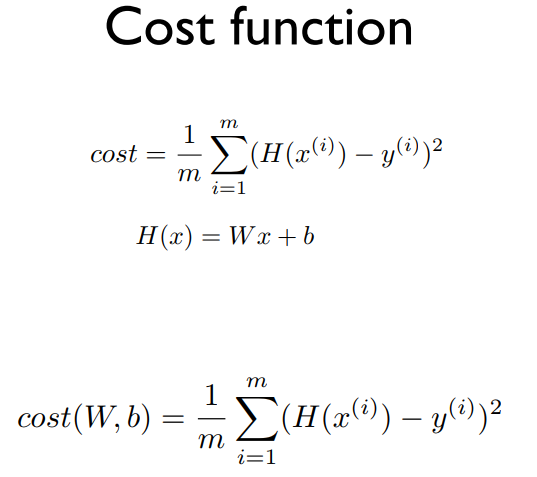
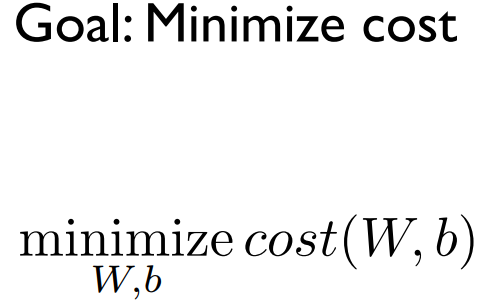

In [ ]:
tf.set_random_seed(777)

In [ ]:
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

In [ ]:
# TensorFlow variable (trainable variable)
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Our Hypothesis H(x) = W * X + b
hypothesis = W * x_train + b

In [ ]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) # reduce_mean 함수는 평균을 구해주는 함수

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

In [ ]:
# Lanch the graph in a session
with tf.Session() as sess : 
    # Initialize global variable in the graph 
    sess.run(tf.global_variables_initializer()) # TensorFlow variable을 쓸 때는 반드시 초기화를 해야함

    # Fit in line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b])

        if step % 100 == 0:
            print(step, cost_val, W_val, b_val)

0 39.759842 [-1.7834473] [0.4365785]
100 0.17252481 [0.51872665] [1.0940013]
200 0.10660986 [0.62168866] [0.8599906]
300 0.06587847 [0.7026127] [0.6760312]
400 0.040708877 [0.7662266] [0.53142214]
500 0.025155613 [0.8162327] [0.41774613]
600 0.015544671 [0.85554206] [0.32838663]
700 0.009605657 [0.8864429] [0.25814193]
800 0.0059357085 [0.9107338] [0.20292306]
900 0.0036679066 [0.9298286] [0.15951604]
1000 0.0022665514 [0.9448388] [0.12539423]
1100 0.0014005932 [0.9566383] [0.0985713]
1200 0.00086547906 [0.9659138] [0.07748596]
1300 0.0005348128 [0.97320515] [0.06091099]
1400 0.00033048334 [0.97893685] [0.04788166]
1500 0.0002042174 [0.98344237] [0.0376393]
1600 0.00012619342 [0.9869842] [0.02958794]
1700 7.798051e-05 [0.98976845] [0.02325888]
1800 4.818587e-05 [0.9919571] [0.01828338]
1900 2.977675e-05 [0.99367756] [0.01437239]
2000 1.8400391e-05 [0.9950299] [0.01129812]


## Linear regression Using placeholder

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)

In [ ]:
# Try to find values for W and b to compute y
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Set placeholder
X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])

# Our Hypothesis
hypothesis = X * W + b

In [ ]:
# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
# Lanch the graph in a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Fit in line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={X: [1, 2, 3], Y:[1, 2, 3]})

        if step % 100 == 0:
            print(step, cost_val, W_val, b_val)

    print("====================================================")
    # Test out model
    print(sess.run(hypothesis, feed_dict={X: [5]}))
    print(sess.run(hypothesis, feed_dict = {X: [2.5]}))
    print(sess.run(hypothesis, feed_dict = {X: [1.5, 3.5]}))

    print("====================================================")
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={X: [1,2,3,4,5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})

        if step % 100 == 0: print(step, cost_val, W_val, b_val)

    print("====================================================")
    print(sess.run(hypothesis, feed_dict={X: [5]}))
    print(sess.run(hypothesis, feed_dict = {X: [2.5]}))
    print(sess.run(hypothesis, feed_dict = {X: [1.5, 3.5]}))

=======================================================================================================

# Minimize cost using gradient decent algorithm

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for ilnear model X * W
hypothesis = W * X

# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Variable for plotting cost function
W_history = []
cost_history = []

In [ ]:
# Lanch the graph in a session
with tf.Session() as sess:
    for i in range(-30, 50):
        curr_w = i * 0.1 # -3 ~ 5까지 0.1만큼 움직이면서
        curr_cost = sess.run(cost, feed_dict={W: curr_w})

        W_history.append(curr_w)
        cost_history.append(curr_cost)

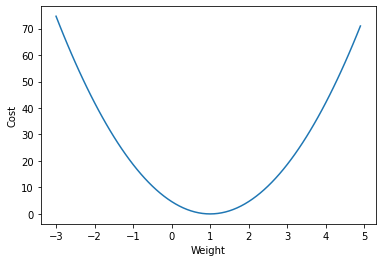

In [ ]:
plt.plot(W_history, cost_history) # Cost function 그림
plt.xlabel("Weight")
plt.ylabel("Cost")
plt.show()

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)

In [ ]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

# weight
W = tf.Variable(tf.random_normal([1]), name = "weight")

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis
hypothesis = W * X

# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [ ]:
# minimize : Gradient Desent using derivarive
learning_rate = 0.1 # Set 알파
gradient = tf.reduce_mean((W * X - Y) * X) # get 미분 값 
descent = W - learning_rate * gradient # Calculate gradient
update = W.assign(descent) # update weight

In [ ]:
with tf.Session() as sess: # open session
    sess.run(tf.global_variables_initializer())

    for step in range(30) :
        _, cost_val, W_val = sess.run([update, cost, W], feed_dict={X:x_data, Y:y_data})
        print(step, cost_val, W_val)

=======================================================================================================

# Multivariable linear regression

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

In [ ]:
# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(4001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y:y_data})
    if step % 200 == 0: print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

# Multivariable linear regerssion using matrix

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

X = tf.placeholder(tf.float32, shape = [None, 3]) # the shape of X is (n, 3)
Y = tf.placeholder(tf.float32, shape = [None, 1]) # the shape of Y is (n. 1)

W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = "bias")

hypothesis = tf.matmul(X, W) + b

In [ ]:
# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X: x_data, Y:y_data})
    if step % 100 == 0: print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

# Multivariable linear regerssion using file data

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from google.colab import drive, files
tf.set_random_seed(777)

In [ ]:
uploaded = files.upload()

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
xy = np.loadtxt('/content/drive/My Drive/모두의 딥러닝/data_01_test_score.csv', delimiter=',', dtype = np.float32)

In [ ]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data, "\nx_data shape : ", x_data.shape)
print(y_data, "\ny_data shape : ", y_data.shape)

In [ ]:
X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b

# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _  = sess.run([cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})
    if step % 1000 == 0 : print(step, "Cost : ", cost_val, "\nPrediction\n", hy_val)

In [ ]:
print('Your score will be ', sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))
print('Other score will be ', sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90,100,80]]}))

Your score will be  [[179.6284]]
Other score will be  [[187.34651]
 [176.60081]]


# Multivariable linear regerssion using Queue runners

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)

filename_queue = tf.train.string_input_producer(
    ['data_01_test_score.csv'], shuffle = False, name = 'filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

In [ ]:
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

In [ ]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


In [ ]:
X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess = sess, coord = coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X:x_batch, Y:y_batch})
    if step % 1000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
    
coord.request_stop()
coord.join(threads)

In [ ]:
print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

print("Other scores will be ",
      sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Your score will be  [[188.83708]]
Other scores will be  [[185.41235]
 [173.48064]]


=======================================================================================================

# Logistic regression

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.03).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis >= 0.5, dtype = tf.float32) # cast란 값을 dtype으로 변수의 type을 변경해줌
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001) :
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
    print('=================================================')
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y:y_data})
    print("\nHypothesis : ", h, "\nCorrect : ", c, "\nAccuracy : ", a)

# Logistic regression using diabetes data

In [ ]:
files.upload()

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('/content/drive/My Drive/모두의 딥러닝/data_03_diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

(759, 8) (759, 1)


In [ ]:
X = tf.placeholder(tf.float32, shape = [None, 8])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.07).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    print('====================================================')
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis: ", h[-5:], "\nCorrect (Y): ....", c[-5:], "\nAccuracy: ", a)

0 0.792574
1000 0.49426106
2000 0.4762565
3000 0.47324347
4000 0.47239164
5000 0.4720545
6000 0.4718897
7000 0.4717996
8000 0.4717478
9000 0.4717171
10000 0.47169873

Hypothesis:  [[0.7610675 ]
 [0.71660364]
 [0.8643945 ]
 [0.7333016 ]
 [0.92872393]] 
Correct (Y): .... [[1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.770751


=======================================================================================================

# SoftMax Classification (Multinomial classification)

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_class = 3;

W = tf.Variable(tf.random_normal([4, nb_class], name = "weight"))
b = tf.Variable(tf.random_normal([nb_class]), name = "bias")

# softmax
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [ ]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict = {X:x_data, Y:y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')
    b = sess.run(hypothesis, feed_dict = {X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.arg_max(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict = {X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.arg_max(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict = {X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.arg_max(all, 1)))

0 3.6577764
1000 0.25661126
2000 0.16052689
3000 0.117736496
4000 0.09260933
5000 0.07616837
6000 0.06460757
7000 0.056050442
8000 0.049469024
9000 0.04425421
10000 0.040022988
--------------
[[3.0140955e-06 9.9999702e-01 4.0909136e-08]] [1]
--------------
[[9.9211580e-01 7.5983033e-03 2.8591207e-04]] [0]
--------------
[[7.3695964e-16 6.3500499e-07 9.9999940e-01]] [2]
--------------
[[3.0140955e-06 9.9999702e-01 4.0908979e-08]
 [9.9211580e-01 7.5983177e-03 2.8591263e-04]
 [7.3695964e-16 6.3500499e-07 9.9999940e-01]] [1 0 2]


# Fency Softmax Classifier using zoo data



In [ ]:
from google.colab import drive, files

In [ ]:
files.upload()

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

xy = np.loadtxt('/content/drive/My Drive/모두의 딥러닝/data-04-zoo.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [ ]:
print(x_data.shape, y_data.shape)

(101, 16) (101, 1)


In [ ]:
nb_class = 7

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])

# one-hot encoding을 하면 rank가 1 증가함 따라서 원래 형태로 바꾸어줘야됨
Y_one_hot = tf.one_hot(Y, nb_class) # one-hot encoding 실행
print("one_hot : ", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_class]) # 형태 재구성
print("reshape one_hot : ", Y_one_hot)

W = tf.Variable(tf.random_normal([16, nb_class]), name="weight")
b = tf.Variable(tf.random_normal([nb_class]), name = "bias")

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# version 1
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = Y_one_hot))

# version 2
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf.stop_gradient([Y_one_hot]))) #stop_gradient함수는 학습하는 부분을 나누어 학습하고자 할 때 사용한다.
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.arg_max(hypothesis, 1) # 가설함수의 값에서 가장 큰 값을 얻음
correct_prediction = tf.equal(prediction, tf.arg_max(Y_one_hot, 1)) # 위에서 얻은 값과 실제 값이 같은지 확인 (1은 열을 기준으로 확인)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # 앞서 얻은 모든 예측 값을 더해서 평균을 계산해 정확도를 계산

one_hot :  Tensor("one_hot_4:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot :  Tensor("Reshape_4:0", shape=(?, 7), dtype=float32)


In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        _, cost_val, acc_val = sess.run([train, cost, accuracy], feed_dict={X:x_data, Y:y_data})
        if step % 500 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

    pred = sess.run(prediction, feed_dict={X:x_data})
    for p, y in zip(pred, y_data.flatten()): # flatten함수는 n차원으로 이루어진 데이터를 직렬화한다.
        print("[{}] Prediction : {} True Y : {}".format(p == int(y), p, int(y)))

=======================================================================================================

# Learning rate and Evaluation
- learning rate에 따라 가중치의 변화와 과적합을 확인해본다.

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1], # one-hot encoding so Our model use softmax
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder(tf.float32, [None, 3])
Y = tf.placeholder(tf.float32, [None, 3])

W = tf.Variable(tf.random_normal([3, 3]), name = 'weight')
b = tf.Variable(tf.random_normal([3]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

prediction = tf.arg_max(hypothesis, 1) # 예상 결과를 얻음
is_correct = tf.equal(prediction, tf.arg_max(Y, 1)) # 예상 결과가 실제와 동일한지 확인
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # 예측 결과와 실제 결과를 비교해 평균을 내 예측 정확도를 계산

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        cost_val,W_val, _ = sess.run([cost, W, train], feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, cost_val, W_val)

    print("Prediction : ", sess.run(prediction, feed_dict={X:x_test}))
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))

0 6.0261106 [[-0.71623707  1.3625672  -0.47856766]
 [-0.45875007  0.24063832  0.83187234]
 [ 1.862092    0.83042866 -2.0092397 ]]
500 3.2745075 [[-10.74248      4.615052     6.29519   ]
 [  0.33790863  -0.18673766   0.4625929 ]
 [  3.2946732   -0.07047409  -2.5409157 ]]
1000 0.7174748 [[-16.937702     6.1262703   10.979184  ]
 [ -0.256973     0.95024425  -0.07950542]
 [  5.918805    -1.0636344   -4.171891  ]]
1500 0.0563428 [[-18.672802     5.383222    13.45734   ]
 [  0.30398613   0.2762802    0.03350021]
 [  6.825936    -1.0841972   -5.0584574 ]]
2000 0.042627208 [[-1.8850306e+01  4.6077857e+00  1.4410220e+01]
 [ 3.4806803e-01  2.5523037e-01  1.0469267e-02]
 [ 6.8889728e+00 -7.3522681e-01 -5.4704733e+00]]
Prediction :  [2 2 2]
Accuracy :  1.0


# Linear regerssion using non regularization data
- 일반화되지 않은 데이터를 사용해 모델을 학습해본 후 예측값과 비용을 확인해본다.

In [ ]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([4, 1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(11):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})

    if step % 2 == 0:
        print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

# Linear regerssion using non regularization data
- 앞서 확인한 문제를 일반화하여 다시 모델을 구축해본다.

In [ ]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

def min_max_scaler(data):
    numerator = data - np.min(data, 0) # 행을 기준(즉 같은 열에서 다른 행까리)으로 가장 작은 값을 빼준다.
    denominator = np.max(data ,0) - np.min(data ,0)
    return numerator / (denominator + 1e-7) # 1e-7은 0으로 나뉘는 것을 방지하기 위한 설정

xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

# very important. It does not work without it.
xy = min_max_scaler(xy)
print(xy)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [ ]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([4, 1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        _, cost_val, hy_val = sess.run([train, cost, hypothesis], feed_dict={X:x_data, Y:y_data})
        if step % 10 == 0:
            print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

# Mnist example

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
nb_class = 10 # 손글씨 데이터의 결과 값의 개수 (one-hot encoding 해야 하는 수와 동일하다)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_class])

W = tf.Variable(tf.random_normal([784, nb_class]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_class]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
train = tf.train.GradientDescentOptimizer(learning_rate=1.2).minimize(cost)

correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
num_epochs = 20
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size=batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations # 평균 cost를 구함 (num_iterations를 사용)
        print("Epoch : {:04d}, Cost : {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finish")

    # eval() 함수는 저장된 Tensor의 값을 볼 수 있는 함수이다. 일반적으로 session이 있어야 하며 with 절 밖에서는 작동이 되지 않는다. 따라서 인자로 session을 설정해야 한다.
    print("Accuracy : ", accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    print("======================================================")

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label : ", sess.run(tf.arg_max(mnist.test.labels[r : r + 1], 1)))
    print("Prediction : ", sess.run(tf.arg_max(hypothesis, 1), feed_dict={X:mnist.test.images[r : r + 1]}))

    # interpolation이란 보간이라는 뜻으로 화면의 해상도와 이미지의 해상도가 다를 경우에 사용된다.
    # 이미지를 압축했다가 다시 압축을 풀때 주로 사용됨
    plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28), cmap = "Greys", interpolation="nearest")
    plt.show()

=======================================================================================================

# Tensor Manipulation

In [3]:
import tensorflow as tf
import numpy as np
import pprint # 임의의 파이썬 데이터 구조를 인터프리터의 입력으로 사용할 수 있는 형태를 지원하는 라이브러리
tf.set_random_seed(777)

pp = pprint.PrettyPrinter(indent = 4) # indent의 경우 들여쓰기를 위한 칸 수

# tf.Session()을 사용하는 경우 자동으로 세션을 할당하지 않기 때문에 주로 with문과 함께 쓰인다.
sess = tf.InteractiveSession() # 이는 자동으로 터미널에 default session을 할당한다.

### Simple Arrary

In [ ]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
pp.pprint(t)
print(t.ndim) # rank
print(t.shape) # shape
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

array([0., 1., 2., 3., 4., 5., 6.])
1
(7,)
0.0 1.0 6.0
[2. 3. 4.] [4. 5.]
[0. 1.] [3. 4. 5. 6.]


### 2D Array

In [ ]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
pp.pprint(t)
print(t.ndim) # rank
print(t.shape) # shape

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])
2
(4, 3)


### Shape, Rank, Axis
- 축의 경우 axis = -1을  하면 제일 안쪽 축을 의미

In [ ]:
t = tf.constant([1,2,3,4])
tf.shape(t).eval()

array([4], dtype=int32)

In [ ]:
t = tf.constant([[1,2],
                 [3,4]])
tf.shape(t).eval()

array([2, 2], dtype=int32)

In [ ]:
# n 차원을 확인할 때는 가장 안쪽의 차원부터 확인하면 쉽게 차원을 확인할 수 있음
t = tf.constant([[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],[[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]]) 
tf.shape(t).eval()

array([1, 2, 3, 4], dtype=int32)

In [ ]:
[
    [
        [
            [1,2,3,4], 
            [5,6,7,8],
            [9,10,11,12]
        ],
        [
            [13,14,15,16],
            [17,18,19,20], 
            [21,22,23,24]
        ]
    ]
]

[[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
  [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]]

### Matmul VS multiply

In [ ]:
# [3, 3,] * [[2],
#            [2]]
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
tf.matmul(matrix1, matrix2).eval()

array([[12.]], dtype=float32)

In [ ]:
(matrix1*matrix2).eval() # 이는 일반적인 행렬 곱셈이 아니라 Broadcasting되어 원소끼리의 곱이 계산된 것

array([[6., 6.],
       [6., 6.]], dtype=float32)

### Watch out broadcasting

In [ ]:
# Broadcasting은 Tensor의 차원을 맞춰주는 역할을 함
# [3, 3] + [[2], 였던 것이 [[3, 3], + [[2, 2],  로 변경됨
#           [2]]            [3, 3]]    [2, 2]] 
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
(matrix1+matrix2).eval()

array([[5., 5.],
       [5., 5.]], dtype=float32)

In [ ]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2., 2.]])
(matrix1+matrix2).eval()

array([[5., 5.]], dtype=float32)

### Random values for variable initialization

In [ ]:
tf.random_normal([3]).eval() # 정규분포로 부터 받은 Tensor의 차원만큼 난수를 반환한다.

array([-0.8951637 ,  0.78747755, -0.12193232], dtype=float32)

In [ ]:
tf.random_uniform([2]).eval() # 균등 분포로부터 받은 Tensor의 차원만큼 난수를 반환한다. 
# 이때 [minval, maxval) 사이의 균등한 난수 값을 반환

array([0.57820594, 0.71260226], dtype=float32)

In [ ]:
tf.random_uniform([2, 3]).eval()

array([[0.3132081 , 0.34272933, 0.4011165 ],
       [0.37095654, 0.9770187 , 0.7233596 ]], dtype=float32)

### Reduced Mean/Sum

In [ ]:
tf.reduce_mean([1, 2], axis = 0).eval()

1

In [ ]:
x = [[1., 2.],
     [3., 4.]]

tf.reduce_mean(x).eval() # 축의 설정이 없으면 전체에 대한 값을 구함

2.5

In [ ]:
tf.reduce_mean(x, axis=0).eval()

array([2., 3.], dtype=float32)

In [ ]:
tf.reduce_mean(x, axis=1).eval()

array([1.5, 3.5], dtype=float32)

In [ ]:
tf.reduce_mean(x, axis=-1).eval()

array([1.5, 3.5], dtype=float32)

In [ ]:
tf.reduce_sum(x).eval()

10.0

In [ ]:
tf.reduce_sum(x, axis=0).eval()

array([4., 6.], dtype=float32)

In [ ]:
tf.reduce_sum(x, axis=-1).eval()

array([3., 7.], dtype=float32)

In [ ]:
tf.reduce_mean(tf.reduce_sum(x, axis=-1)).eval()

5.0

### Argmax with axis

In [ ]:
# argmax는 축을 기준으로 큰 값의 위치(index)를 구해줌
x = [[0, 1, 2],
     [2, 1, 0]]
tf.argmax(x, axis=0).eval()

array([1, 0, 0])

In [ ]:
tf.argmax(x, axis=1).eval()

array([2, 0])

In [ ]:
tf.argmax(x, axis=-1).eval()

array([2, 0])

### Reshape, Squeeze, expand_dims

In [ ]:
# reshape에서 가장 마지막 축은 통상적으로 변경하지 않고 나머지를 조정한다.
t = np.array([[[0, 1, 2], 
               [3, 4, 5]],
              
              [[6, 7, 8], 
               [9, 10, 11]]])
t.shape

(2, 2, 3)

In [ ]:
tf.reshape(t, shape=[-1, 3]).eval()

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
tf.reshape(t, shape=[-1, 1, 3]).eval()

array([[[ 0,  1,  2]],

       [[ 3,  4,  5]],

       [[ 6,  7,  8]],

       [[ 9, 10, 11]]])

In [8]:
tf.squeeze([[[0]], [[1]], [[2]]]).eval() # Tensor에서 크기가 1인 차원을 없애줌

array([0, 1, 2], dtype=int32)

In [10]:
# 이는 크기가 1인 차원을 삽입한다.
tf.expand_dims([0, 1, 2], 1).eval() # -1-input.dims() <= dim <= input.dims()안에서 확장가능

array([[0],
       [1],
       [2]], dtype=int32)

### One hot

In [ ]:
# One hot encoding을 수행하면 차원이 1개 늘어남
tf.one_hot([[0], [1], [2], [0]], depth=3).eval() # depth인자는 encoding의 길이를 결정, 따라서 이는 데이터 Label의 수만큼 지정해주면 됨

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[1., 0., 0.]]], dtype=float32)

In [ ]:
t = tf.one_hot([[0], [1], [2], [0]], depth=3)
tf.reshape(t, shape=[-1, 3]).eval()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

### Casting

In [ ]:
# casting은 데이터를 원하는 type으로 변경함
tf.cast([1.8, 2.2, 3.3, 4.9], tf.int32).eval()

array([1, 2, 3, 4], dtype=int32)

In [ ]:
tf.cast([True, False, 1 == 1, 0 == 1], tf.int32).eval()

array([1, 0, 1, 0], dtype=int32)

### Stack

In [ ]:
# stack은 축을 기준으로 stack을 한다. 축을 설정하지 않으면 변수의 순서대로 stack에 쌓인다.
x = [1, 4]
y = [2, 5]
z = [3, 6]

# Pack along first dim.
tf.stack([x, y, z]).eval()

array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)

In [ ]:
tf.stack([x, y, z], axis=1).eval()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

### Ones like and Zeros like

In [ ]:
# 이는 인자로 받은 데이터의 차원과 똑같은 크기에 1 or 0을 삽입하여 생성한다.
x = [[0, 1, 2],
     [2, 1, 0]]

tf.ones_like(x).eval()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [ ]:
tf.zeros_like(x).eval()

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

### Zip

In [ ]:
for x, y in zip([1, 2, 3], [4, 5, 6]):
    print(x, y)

1 4
2 5
3 6


In [ ]:
for x, y, z in zip([1, 2, 3], [4, 5, 6], [7, 8, 9]):
    print(x, y, z)

1 4 7
2 5 8
3 6 9


### Transpose

In [ ]:
t = np.array([[[0, 1, 2], [3, 4, 5]], [[6, 7, 8], [9, 10, 11]]])
pp.pprint(t.shape)
pp.pprint(t)

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])


In [ ]:
t1 = tf.transpose(t, [1, 0, 2]) # perm은 해당 Tensor의 차원만큼 생성하여 index 위치를 변경하면 된다. 이는 Permutation을 사용한다.
pp.pprint(sess.run(t1).shape)
pp.pprint(sess.run(t1))

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 6,  7,  8]],

       [[ 3,  4,  5],
        [ 9, 10, 11]]])


In [ ]:
t2 = tf.transpose(t, [1, 2, 0])
pp.pprint(sess.run(t2).shape)
pp.pprint(sess.run(t2))

(2, 3, 2)
array([[[ 0,  6],
        [ 1,  7],
        [ 2,  8]],

       [[ 3,  9],
        [ 4, 10],
        [ 5, 11]]])


In [ ]:
t = tf.transpose(t2, [2, 0, 1])
pp.pprint(sess.run(t).shape)
pp.pprint(sess.run(t))

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])


=======================================================================================================

# XOR Problem

In [16]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# Cross entropy
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

prediction = tf.cast(hypothesis > 0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, Y), dtype = tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val, W_val = sess.run([train, cost, W], feed_dict={X:x_data, Y:y_data})
        if step % 1000 == 0:
            print(step, "Cost : ", cost_val, "\nWeight : \n", W_val)

        
    h, c, a = sess.run([hypothesis, prediction, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis: \n", h, "\nCorrect: \n", c, "\nAccuracy: ", a)

# XOR Problem with NN

In [24]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])
"""
아래에서 깊이를 조절할 수 있다. 각각의 weight와 bias의 크기를 조절하면 됨
ex)
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

W1에서 [2, 10]은 입력이 2개이고 그 다음 층으로 10개의 synaps를 연결하겠다는 의미
"""
W1 = tf.Variable(tf.random_normal([2, 2]), name = "weight1")
b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name = "weight2")
b2 = tf.Variable(tf.random_normal([1]), name = "bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.4).minimize(cost)

prediction = tf.cast(hypothesis > 0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, Y), dtype = tf.float32))

In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
        if step % 500 == 0:
            print(step, cost_val)

    h, p, a = sess.run([hypothesis, prediction, accuracy], feed_dict={X:x_data, Y:y_data})
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

0 1.4502864
500 0.41028115
1000 0.098525286
1500 0.04928147
2000 0.032226417
2500 0.023792803
3000 0.01880592
3500 0.015524515
4000 0.01320667
4500 0.0114845745
5000 0.010155836
5500 0.009100258
6000 0.008241738
6500 0.0075300788
7000 0.0069306656
7500 0.0064190812
8000 0.0059773615
8500 0.005592146
9000 0.0052532563
9500 0.0049529457
10000 0.0046848897

Hypothesis:
[[0.00412437]
 [0.9945486 ]
 [0.9945491 ]
 [0.00366575]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


# TensorBoard

In [ ]:
# %load_extensorboard 이후 tensorboard 실행
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name="x")
Y = tf.placeholder(tf.float32, [None, 1], name="y")

with tf.name_scope("Layer1"):
    W1 = tf.Variable(tf.random_normal([2, 2]), name="weight_1")
    b1 = tf.Variable(tf.random_normal([2]), name="bias_1")
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("Layer1", layer1)


with tf.name_scope("Layer2"):
    W2 = tf.Variable(tf.random_normal([2, 1]), name="weight_2")
    b2 = tf.Variable(tf.random_normal([1]), name="bias_2")
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    tf.summary.histogram("W2", W2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("Hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("Cost"):
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    tf.summary.scalar("Cost", cost)

with tf.name_scope("Train"):
    train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, summary, cost_val = sess.run([train, merged_summary, cost], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

In [54]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir=/content/logs/xor_logs_r0_01/

=======================================================================================================

# Linear BackPropagation

In [ ]:
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# tf Graph Input
x_data = [[1.],
          [2.],
          [3.]]
y_data = [[1.],
          [2.],
          [3.]]


# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Set wrong model weights
# 절단정규분포란 확률 변수가 존재할 수 있는 범위에 최대값 혹은 최소값을 정하여 자른 분포를 정규분포에 적용한 분포를 의미한다.
W = tf.Variable(tf.truncated_normal([1, 1])) # truncated_normal은 절단정규분포로 부터의 난수 값을 반환한다.
b = tf.Variable(5.)

# Forward prop
hypothesis = tf.matmul(X, W) + b

#diff
# assert 함수는 False일 때 에러를 출력함
assert hypothesis.shape.as_list() == Y.shape.as_list()
diff = (hypothesis - Y) # 예측값과 실제값의 차이를 구함

# Back prop (chain rule)
d_l1 = diff
d_b = d_l1 # 이는 Linear한 경우 H(x)를 bias에 대해 미분하면 1이므로 그대로 들어감
d_w = tf.matmul(tf.transpose(X), d_l1) # 이는 weight에 대해서 미분하면 X이므로 이와 앞선 차이값과 곱함(chain rule)

print(X, W, d_l1, d_w)

# Updating network using gradients
learning_rate = 0.1
step = [ # 각각의 step마다 가중치와 bias를 변화시킴 (Using Gradient Descent Algorithm)
        tf.assign(W, W - learning_rate * d_w),
        tf.assign(b, b - learning_rate * tf.reduce_mean(d_b))
]

# Runnung and testing the training process
# RMSE (Root Mean Square Error : 평균 제곱근 오차)
RMSE = tf.reduce_mean(tf.square(Y - hypothesis)) 

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    print(i, sess.run([step, RMSE], feed_dict={X:x_data, Y:y_data}))

print(sess.run(hypothesis, feed_dict={X:x_data}))

# Multivariable Linear BackPropagation
- 다변수이기는 하나 가설함수가 Linear regression과 동일하므로 코드는 동일하고 데이터만 달라짐

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)  # reproducibility

# tf Graph Input
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Set wrong model weights
W = tf.Variable(tf.truncated_normal([3, 1]))
b = tf.Variable(5.)

hypothesis = tf.matmul(X, W) + b

assert hypothesis.shape.as_list() == Y.shape.as_list()
diff = (hypothesis - Y) 

# Back prop (chain rule)
d_l1 = diff
d_b = d_l1
d_w = tf.matmul(tf.transpose(X), d_l1)
print(X, d_l1, d_w)

# Updating network using gradients
learning_rate = 1e-6
step = [
    tf.assign(W, W - learning_rate * d_w),
    tf.assign(b, b - learning_rate * tf.reduce_mean(d_b)),
]

RMSE = tf.reduce_mean(tf.square(Y - hypothesis))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    print(i, sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data}))

print(sess.run(hypothesis, feed_dict={X: x_data}))

# Sigmoid BackPropagation

In [1]:
import tensorflow as tf
import numpy as np
from google.colab import drive, files
tf.set_random_seed(777)

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
xy = np.loadtxt("/content/drive/My Drive/모두의 딥러닝/data-04-zoo.csv", delimiter = ',', dtype = np.float32)

X_data = xy[:, 0:-1]
N = X_data.shape[0]
y_data = xy[:, [-1]]

print("y has one of the following values")
print(np.unique(y_data)) # Unique 함수는 저장된 데이터중 중복되지 않는 고유 값을 출력 (set 연산결과와 동일)
print("\nShape of X data : ", X_data.shape) # (101, 16), 101은 데이터의 수, 16은 feature의 수
print("Shape of y data : ", y_data.shape) # (101, 1), 101은 데이터의 수, 1은 정답

y has one of the following values
[0. 1. 2. 3. 4. 5. 6.]

Shape of X data :  (101, 16)
Shape of y data :  (101, 1)


In [6]:
X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])
nb_classes = 7 # the number of Unique data

# one hot encoding
target = tf.one_hot(Y, nb_classes) # Label 인코딩 한것
target = tf.reshape(target, [-1, nb_classes])
target = tf.cast(target, tf.float32)

W = tf.Variable(tf.random_normal([16, nb_classes]), name = "weight")
b = tf.Variable(tf.random_normal([nb_classes]), name = "bias")

def sigma(x): 
    # sigmoid function
    # σ(x) = 1 / (1 + exp(-x))
    return 1. / (1. + tf.exp(-x))

def sigma_prime(x):
    # derivative of the sigmoid function
    # σ'(x) = σ(x) * (1 - σ(x))
    return sigma(x) * (1. - sigma(x))

In [7]:
# Forward propagation
layer_1 = tf.matmul(X, W) + b
y_pred = sigma(layer_1) # 가설함수 H(x)

# Lost function (end of forward propagation)
loss_i = -target * tf.log(y_pred) - (1. - target) * tf.log(1. - y_pred)
loss = tf.reduce_sum(loss_i)

assert y_pred.shape.as_list() == target.shape.as_list() # Demension check

d_loss = (y_pred - target) / (y_pred * (1. - y_pred) + 1e-7) # 손실함수를 y_pred에 의해 편미분
d_sigma = sigma_prime(layer_1) # layer1 sigmoid 함수 미분
d_layer = d_loss * d_sigma # chain rule
d_b = d_layer # bias의 편미분 값
d_W = tf.matmul(tf.transpose(X), d_layer) # weight의 편미분 값

# Updating network using gradients
learning_rate = 0.01
train_step = [
    tf.assign(W, W - learning_rate * d_W),
    tf.assign(b, b - learning_rate * tf.reduce_sum(d_b))
]

# Prediction and Accuracy
prediction = tf.arg_max(y_pred, 1) # 가설함수 H(x)의 결과값을 얻음
acct_mat = tf.equal(tf.arg_max(y_pred, 1), tf.arg_max(target, 1)) # encoding한 값과 예측 값을 비교해 똑같은지 확인
acct_res = tf.reduce_mean(tf.cast(acct_mat, tf.float32)) # 정확도를 구함

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(500):
        sess.run(train_step, feed_dict={X:X_data, Y: y_data})

        if step % 50 == 0:
            step_loss, acc = sess.run([loss, acct_res], feed_dict={X:X_data, Y:y_data})
            print("Step: {:5}\t Loss: {:10.5f}\t Acc: {:.2%}" .format(step, step_loss, acc))

    pred = sess.run(prediction, feed_dict = {X:X_data})
    for p, y in zip(pred, y_data):
        msg = "[{}]\t Prediction: {:d}\t True y: {:d}"
        print(msg.format(p == int(y[0]), p, int(y[0])))

# XOR problem using NN and backpropagation

In [38]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

In [43]:
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

x_data = np.array(x_data, dtype = np.float32)
y_data = np.array(y_data, dtype = np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
y_pred = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# Cost
cost = -tf.reduce_mean(Y * tf.log(y_pred) + (1 - Y) * tf.log(1 - y_pred))

# Loss derivative
d_y_pred = (y_pred - Y) / (y_pred * (1. - y_pred) + 1e-7)

# Layer 2
d_sigma2 = y_pred * (1 - y_pred)
d_a2 = d_y_pred * d_sigma2
d_p2 = d_a2
d_b2 = d_a2
d_W2 = tf.matmul(tf.transpose(layer1), d_a2)

# Mean
d_b2_mean = tf.reduce_mean(d_b2, axis = 0)
d_W2_mean = d_W2 / tf.cast(tf.shape(layer1)[0], dtype = tf.float32)

# Layer 1
d_l1 = tf.matmul(d_p2, tf.transpose(W2))
d_sigma1 = layer1 * (1 - layer1)
d_a1 = d_l1 * d_sigma1
d_p1 = d_a1
d_b1 = d_a1
d_W1 = tf.matmul(tf.transpose(X), d_a1)

# Mean
d_b1_mean = tf.reduce_mean(d_b1, axis = 0)
d_W1_mean = d_W1 / tf.cast(tf.shape(X)[0], dtype = tf.float32)

In [44]:
# Weight, bias Update
step = [
    tf.assign(W2, W2 - learning_rate * d_W2_mean),
    tf.assign(b2, b2 - learning_rate * d_b2_mean),
    tf.assign(W1, W1 - learning_rate * d_W1_mean),
    tf.assign(b1, b1 - learning_rate * d_b1_mean)
]

predicted = tf.cast(y_pred > 0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    print("Shape : ", sess.run(tf.shape(X)[0], feed_dict={X:x_data}))
    for i in range(10001):
        sess.run([step, cost], feed_dict={X:x_data, Y:y_data})
        if i % 1000 == 0:
            print(i, sess.run([cost, d_W1], feed_dict={X:x_data, Y:y_data}), sess.run([W1,W2]))
    
    h, c, a = sess.run([y_pred, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

=======================================================================================================

# Mnist data using Softmax

In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [52]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]), name = "weight")
b = tf.Variable(tf.random_normal([10]), name = 'bias')

learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits = hypothesis, labels=tf.stop_gradient(Y)))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

Epoch : 0001, Cost : 5.845344242
Epoch : 0002, Cost : 1.754060971
Epoch : 0003, Cost : 1.125942554
Epoch : 0004, Cost : 0.882290060
Epoch : 0005, Cost : 0.749617500
Epoch : 0006, Cost : 0.663576683
Epoch : 0007, Cost : 0.602428588
Epoch : 0008, Cost : 0.557067518
Epoch : 0009, Cost : 0.521780547
Epoch : 0010, Cost : 0.492463758
Epoch : 0011, Cost : 0.469210570
Epoch : 0012, Cost : 0.449686813
Epoch : 0013, Cost : 0.431935687
Epoch : 0014, Cost : 0.417769474
Epoch : 0015, Cost : 0.405345853
Epoch : 0016, Cost : 0.394051853
Epoch : 0017, Cost : 0.384073939
Epoch : 0018, Cost : 0.375196192
Epoch : 0019, Cost : 0.366854404
Epoch : 0020, Cost : 0.359681245
Epoch : 0021, Cost : 0.352365175
Epoch : 0022, Cost : 0.346548310
Epoch : 0023, Cost : 0.341069564
Epoch : 0024, Cost : 0.335704963
Epoch : 0025, Cost : 0.330485065
Epoch : 0026, Cost : 0.326341562
Epoch : 0027, Cost : 0.322235597
Epoch : 0028, Cost : 0.317619799
Epoch : 0029, Cost : 0.314133110
Epoch : 0030, Cost : 0.310698946
Epoch : 00

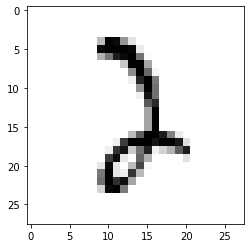

In [55]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        avg_cost = 0;
        for iterations in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size=batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
        print(f"Epoch : {(epoch + 1):04d}, Cost : {avg_cost:.9f}")
    print("Learning Finished!")

    # Test Model
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1)))
    print("Prediction : ", sess.run(tf.argmax(hypothesis, axis = 1), feed_dict={X:mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = "Greys", interpolation="nearest")
    plt.show()

# Mnist data using NN(Neural Network)

In [71]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [81]:
learning_rate = 0.001
batch_size = 100
num_epochs = 30
num_iterations = int(mnist.train.num_examples / batch_size)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weight & bias
W1 = tf.Variable(tf.random_normal([784, 256]))
W2 = tf.Variable(tf.random_normal([256, 256]))
W3 = tf.Variable(tf.random_normal([256, 10]))

b1 = tf.Variable(tf.random_normal([256]))
b2 = tf.Variable(tf.random_normal([256]))
b3 = tf.Variable(tf.random_normal([10]))

L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits = hypothesis, labels = tf.stop_gradient(Y)))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [82]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
        print(f"Epoch:, {(epoch + 1):04d} Cost ={avg_cost:.9f}")
    
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction : ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r + 1]}))

Epoch:, 0001 Cost =164.026944965
Epoch:, 0002 Cost =39.142109765
Epoch:, 0003 Cost =24.292617924
Epoch:, 0004 Cost =16.762677449
Epoch:, 0005 Cost =12.276867667
Epoch:, 0006 Cost =9.139037125
Epoch:, 0007 Cost =6.882186007
Epoch:, 0008 Cost =5.233329480
Epoch:, 0009 Cost =3.923866417
Epoch:, 0010 Cost =2.960089436
Epoch:, 0011 Cost =2.264418679
Epoch:, 0012 Cost =1.679288431
Epoch:, 0013 Cost =1.229421321
Epoch:, 0014 Cost =1.065452868
Epoch:, 0015 Cost =0.789348394
Epoch:, 0016 Cost =0.585469880
Epoch:, 0017 Cost =0.578272078
Epoch:, 0018 Cost =0.467115121
Epoch:, 0019 Cost =0.421564554
Epoch:, 0020 Cost =0.468673886
Epoch:, 0021 Cost =0.396741424
Epoch:, 0022 Cost =0.369297086
Epoch:, 0023 Cost =0.292738426
Epoch:, 0024 Cost =0.343759092
Epoch:, 0025 Cost =0.257294092
Epoch:, 0026 Cost =0.340049056
Epoch:, 0027 Cost =0.256437030
Epoch:, 0028 Cost =0.188142484
Epoch:, 0029 Cost =0.244876553
Epoch:, 0030 Cost =0.229501456
Accuracy :  0.9549
Label :  [9]
Prediction :  [9]


# Mnist data using Xavier initialization
- tensorflow의 Variable함수의 경우 변수의 재정의가 가능하지만 get_variable함수의 경우 함수의 재정의를 하면 에러 메세지를 출력한다.
- 해결방법
     - reset_default_graph() 실행
     - 특정 공간에서 사용할 수 있도록 설정</br>
     with tf.variable_scope("foo") as scope:</br>
        v = tf.get_variable("v", [1])</br>
        scope.reuse_variables()</br>
        v1 = tf.get_variable("v", [1])

In [92]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph() # Graph를 초기화함
tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [93]:
learning_rate = 0.001
num_epochs = 20
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable("W1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer(),)
W2 = tf.get_variable("W2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
W3 = tf.get_variable("W3", shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())

b1 = tf.get_variable("b1", shape=[256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", shape=[256], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3", shape=[10], initializer=tf.contrib.layers.xavier_initializer())

L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits = hypothesis, labels = tf.stop_gradient(Y)))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [94]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
        print(f"Epoch : {(epoch + 1):04d} Cost : {avg_cost:.9f}")
    
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], axis = 1)))
    print("Prediction : ", sess.run(tf.argmax(hypothesis, axis = 1), feed_dict={X:mnist.test.images[r:r+1]}))


Epoch : 0001 Cost : 0.258092222
Epoch : 0002 Cost : 0.099430435
Epoch : 0003 Cost : 0.064058436
Epoch : 0004 Cost : 0.045132862
Epoch : 0005 Cost : 0.033695466
Epoch : 0006 Cost : 0.026639014
Epoch : 0007 Cost : 0.021025107
Epoch : 0008 Cost : 0.018407136
Epoch : 0009 Cost : 0.013295779
Epoch : 0010 Cost : 0.016456111
Epoch : 0011 Cost : 0.014693411
Epoch : 0012 Cost : 0.008958103
Epoch : 0013 Cost : 0.010271923
Epoch : 0014 Cost : 0.012673172
Epoch : 0015 Cost : 0.009004625
Epoch : 0016 Cost : 0.011473492
Epoch : 0017 Cost : 0.009119579
Epoch : 0018 Cost : 0.004937741
Epoch : 0019 Cost : 0.007395630
Epoch : 0020 Cost : 0.008520500
Accuracy :  0.9783
Label :  [4]
Prediction :  [4]


# Mnist example using Xavier initialization and Deep Neural Network

In [95]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph() # Graph를 초기화함
tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [96]:
learning_rate = 0.001
num_epochs = 20
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable("W1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
W2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
W3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
W4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
W5 = tf.get_variable("W5", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())

b1 = tf.get_variable("b1", shape=[512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", shape=[512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3", shape=[512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.get_variable("b4", shape=[512], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.get_variable("b5", shape=[10], initializer=tf.contrib.layers.xavier_initializer())

L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    labels = tf.stop_gradient(Y), logits = hypothesis))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [97]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        avg_cost = 0
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([train, cost], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += c / num_iterations
        print(f"Epoch : {(epoch + 1):04d} Cost : {avg_cost:.09f}")

    print("Accuracy : ", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction : ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}))

Epoch : 0001 Cost : 0.223739070
Epoch : 0002 Cost : 0.093816475
Epoch : 0003 Cost : 0.064717658
Epoch : 0004 Cost : 0.049961032
Epoch : 0005 Cost : 0.039775950
Epoch : 0006 Cost : 0.034555933
Epoch : 0007 Cost : 0.030925110
Epoch : 0008 Cost : 0.026532033
Epoch : 0009 Cost : 0.024735084
Epoch : 0010 Cost : 0.022696175
Epoch : 0011 Cost : 0.018317628
Epoch : 0012 Cost : 0.018765612
Epoch : 0013 Cost : 0.016938766
Epoch : 0014 Cost : 0.017885028
Epoch : 0015 Cost : 0.016164363
Epoch : 0016 Cost : 0.014309136
Epoch : 0017 Cost : 0.011680253
Epoch : 0018 Cost : 0.010406601
Epoch : 0019 Cost : 0.013328722
Epoch : 0020 Cost : 0.014909166
Accuracy :  0.9796
Label :  [5]
Prediction :  [5]


# Mnist example using dropout

In [104]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph() # Graph를 초기화함
tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [105]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob)
keep_prob = tf.placeholder(tf.float32)

W1 = tf.get_variable("W1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
W2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
W3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
W4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
W5 = tf.get_variable("W5", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())

b1 = tf.get_variable("b1", shape=[512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", shape=[512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3", shape=[512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.get_variable("b4", shape=[512], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.get_variable("b5", shape=[10], initializer=tf.contrib.layers.xavier_initializer())

L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=hypothesis, labels=tf.stop_gradient(Y)))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [106]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        avg_cost = 0
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([train, cost], feed_dict={X:batch_xs, Y:batch_ys, keep_prob: 0.7})
            avg_cost += c / num_iterations
        print(f"Epoch : {(epoch + 1):04d} Cost : {avg_cost:.09f}")

    print("Accuracy : ", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob: 1}))

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction : ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1], keep_prob: 1}))

Epoch : 0001 Cost : 0.326507870
Epoch : 0002 Cost : 0.148148345
Epoch : 0003 Cost : 0.117093659
Epoch : 0004 Cost : 0.097593225
Epoch : 0005 Cost : 0.084203222
Epoch : 0006 Cost : 0.072664024
Epoch : 0007 Cost : 0.071217502
Epoch : 0008 Cost : 0.063730464
Epoch : 0009 Cost : 0.057553791
Epoch : 0010 Cost : 0.057352162
Epoch : 0011 Cost : 0.053237598
Epoch : 0012 Cost : 0.049845049
Epoch : 0013 Cost : 0.049626401
Epoch : 0014 Cost : 0.045118828
Epoch : 0015 Cost : 0.042669084
Epoch : 0016 Cost : 0.042158150
Epoch : 0017 Cost : 0.041701348
Epoch : 0018 Cost : 0.038605203
Epoch : 0019 Cost : 0.039563867
Epoch : 0020 Cost : 0.037410265
Accuracy :  0.9839
Label :  [8]
Prediction :  [8]


# Mnist data using batch normalization

In [102]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

tf.reset_default_graph()
tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
mnist.train.images.shape

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


(55000, 784)

In [103]:
class Model:
    def __init__(self, name, input_dim, output_dim, hidden_dims=[32,32], use_batchnorm=True, activation_fn=tf.nn.relu, optimizer = tf.train.AdamOptimizer, lr=0.01):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, [None, input_dim], name = "X") # placeholder 생성 [None, 784]
            self.Y = tf.placeholder(tf.float32, [None, output_dim], name = "Y") # placeholder 생성 [None, 10]
            self.mode = tf.placeholder(tf.bool, name = 'train_mode')

            # Loop over hidden layers
            # Layer의 깊이만큼 각각의 층에서 batch normalization을 진행하여 활성함수에 적용
            net = self.X
            for i, h_dim in enumerate(hidden_dims):
                with tf.variable_scope(f'layer{i}'):
                    net = tf.layers.dense(net, h_dim)
                    if use_batchnorm:
                        net = tf.layers.batch_normalization(net, training=self.mode)
                        # 위의 연산시 계산되는 평균과 분산을 업데이트 해야하는데 이를 자동으로 하지 못함
                        # update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
                        # with tf.control_dependencies(update_ops):
                        #     optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
                    net = activation_fn(net)

            # Attach fully connected layers
            # Output Layer와 위에서 hidden layer를 모두 통과한 것과 연결함
            net = tf.contrib.layers.flatten(net)
            net = tf.layers.dense(net, output_dim)

            self.loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits = net, labels = tf.stop_gradient(self.Y))
            self.loss = tf.reduce_mean(self.loss, name = "loss")

            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=name)

            with tf.control_dependencies(update_ops):
                self.train_op = optimizer(lr).minimize(self.loss)

            # Accuracy etc
            softmax = tf.nn.softmax(net, name = 'softmax')
            self.accuracy = tf.equal(tf.argmax(softmax, 1), tf.argmax(self.Y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(self.accuracy, tf.float32))

In [104]:
class Solver:
    def __init__(self, sess, model):
        self.model = model
        self.sess = sess
    def train(self, X, Y):
        feed = {
            self.model.X: X,
            self.model.Y: Y,
            self.model.mode: True
        }
        train_op = self.model.train_op
        loss = self.model.loss

        return self.sess.run([train_op, loss], feed_dict=feed)

    def evaluate(self, X, Y, batch_size = None):
        if batch_size:
            N = X.shape[0]
            total_loss = 0
            total_acc = 0
            
            for i in range(0, N, batch_size):
                X_batch = X[i:i + batch_size]
                Y_batch = Y[i:i + batch_size]
                feed = {
                    self.model.X: X_batch,
                    self.model.Y: Y_batch,
                    self.model.mode: False
                }
                loss = self.model.loss
                accuracy = self.model.accuracy

                step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed)
                total_loss += step_loss * X_batch.shape[0]
                total_acc += step_acc * X_batch.shape[0]
            total_loss /= N
            total_acc /= N

            return total_loss, total_acc
        else:
            feed = {
                self.model.X:X,
                self.model.Y:Y,
                self.model.mode:False
            }
            loss = self.model.loss
            accuracy = self.model.accuracy

            return self.sess.run([loss, accuracy], feed_dict=feed)

In [105]:
input_dim = 784
output_dim = 10
N = 55000

sess = tf.InteractiveSession()

# 4개의 hidden layer를 사용
bn = Model("batchnorm", input_dim, output_dim, hidden_dims = [32, 32, 32, 32], use_batchnorm=True)
nn = Model('no_norm', input_dim, output_dim, hidden_dims = [32, 32, 32, 32], use_batchnorm=False)

bn_solver = Solver(sess, bn)
nn_solver = Solver(sess, nn)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [106]:
epoch_n = 30
batch_size = 100

train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

In [ ]:
sess.run(tf.global_variables_initializer())
for epoch in range(epoch_n):
    for _ in range(int(N / batch_size)):
        X_batch, Y_batch = mnist.train.next_batch(batch_size)
        _, bn_loss = bn_solver.train(X_batch, Y_batch)
        _, nn_loss = nn_solver.train(X_batch, Y_batch)
    b_loss, b_acc = bn_solver.evaluate(mnist.test.images, mnist.test.labels, batch_size)
    n_loss, n_acc = nn_solver.evaluate(mnist.test.images, mnist.test.labels, batch_size)

    train_losses.append([b_loss, n_loss])
    train_accs.append([b_acc, n_acc])
    print(f'[Epoch {epoch + 1}-TRAIN] Batchnorm Loss(Acc): {b_loss:.5f}({b_acc:.2%}) vs No Batchnorm Loss(Acc): {n_loss:.5f}({n_acc:.2%})')

    b_loss, b_acc = bn_solver.evaluate(mnist.validation.images, mnist.validation.labels, batch_size)
    n_loss, n_acc = nn_solver.evaluate(mnist.validation.images, mnist.validation.labels, batch_size)

    valid_losses.append([b_loss, n_loss])
    valid_accs.append([b_acc, n_acc])
    print(f'[Epoch {epoch + 1}-VALID] Batchnorm Loss(Acc): {b_loss:.5f}({b_acc:.2%}) vs No Batchnorm Loss(Acc): {n_loss:.5f}({n_acc:.2%})')


In [108]:
bn_solver.evaluate(mnist.test.images, mnist.test.labels)

[0.10093894, 0.9758]

In [109]:
nn_solver.evaluate(mnist.test.images, mnist.test.labels)

[0.19021103, 0.9624]

In [110]:
def plot_compare(loss_list: list, ylim = None, title = None):
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize = (15, 10))
    plt.plot(bn, label = 'With BN')
    plt.plot(nn, label = 'Without BN')
    if ylim:
        plt.ylim(ylim)
    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

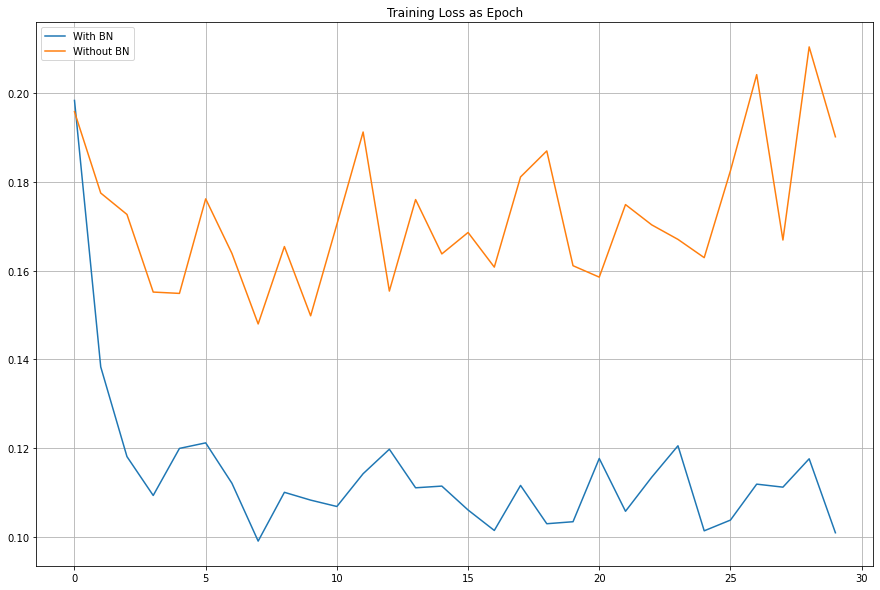

In [111]:
plot_compare(train_losses, title = "Training Loss as Epoch")

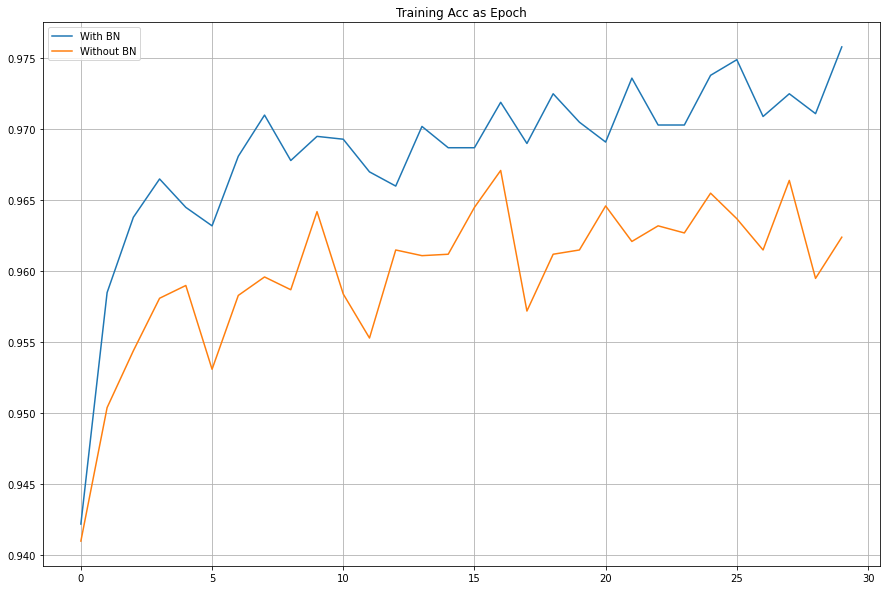

In [112]:
plot_compare(train_accs, title = 'Training Acc as Epoch')

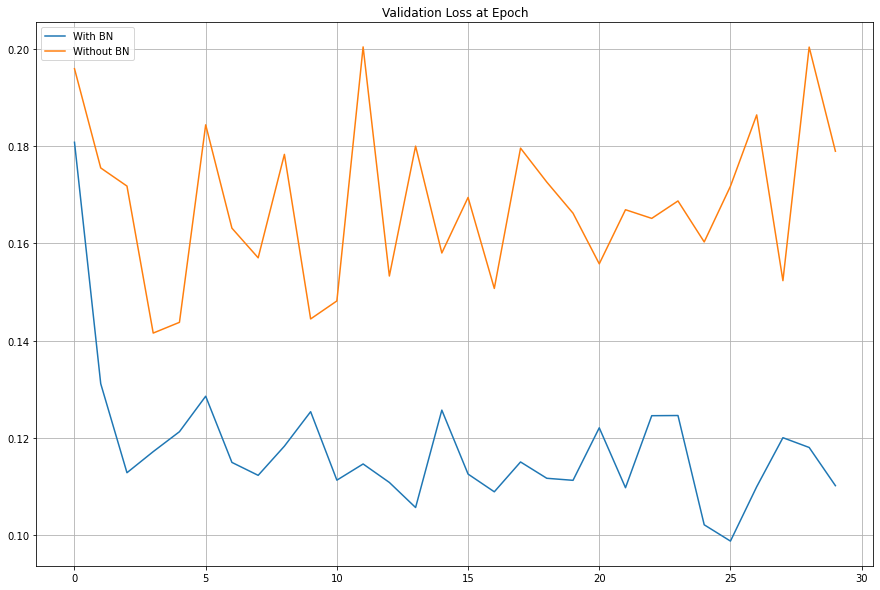

In [113]:
plot_compare(valid_losses, title = "Validation Loss at Epoch")

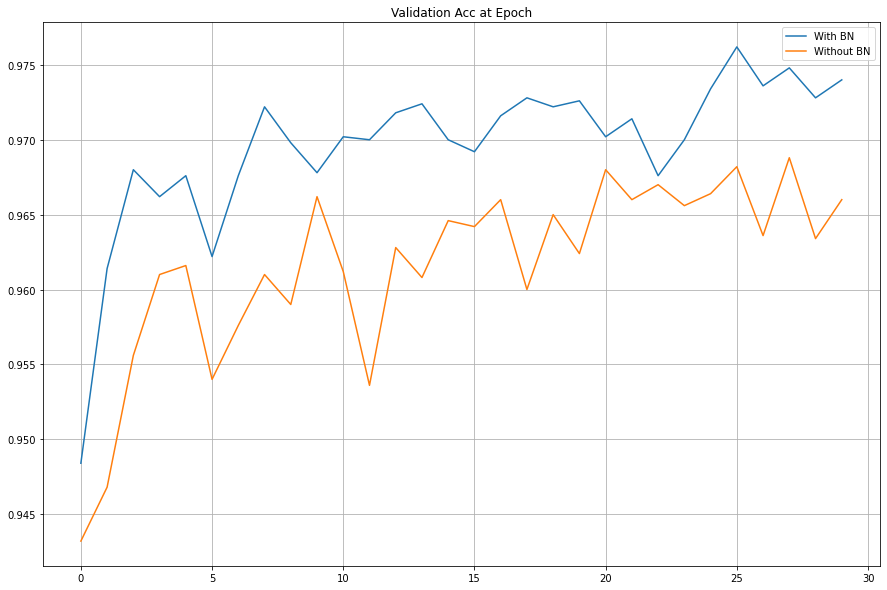

In [114]:
plot_compare(valid_accs, title = 'Validation Acc at Epoch')

# Mnist data using Higher level API and NN

# Mnist data using Scaled ELU function(Selu) and NN

# Mnist data using Back Propagation

In [38]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot= True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [41]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.Variable(tf.truncated_normal([784, 30]))
b1 = tf.Variable(tf.truncated_normal([1, 30]))
w2 = tf.Variable(tf.truncated_normal([30, 10]))
b2 = tf.Variable(tf.truncated_normal([1, 10]))

def sigma(x):
    return tf.div(tf.constant(1.0), tf.add(tf.constant(1.0), tf.exp(-x)))

def sigma_prime(x):
    return sigma(x) * (1 - sigma(x))

# Forward prop
l1 = tf.add(tf.matmul(X, w1), b1)
a1 = sigma(l1)
l2 = tf.add(tf.matmul(a1, w2), b2)
y_pred = sigma(l2)

# diff
assert y_pred.shape.as_list() == Y.shape.as_list()
diff = (y_pred - Y)

# Back prop (chain rule) (앞선 back propagation에서는 차이를 곱하지 않았지만 이번에는 곱함)
d_l2 = diff * sigma_prime(l2)
d_b2 = d_l2
d_w2 = tf.matmul(tf.transpose(a1), d_l2)

d_a1 = tf.matmul(d_l2, tf.transpose(w2))
d_l1 = d_a1 * sigma_prime(l1)
d_b1 = d_l1
d_w1 = tf.matmul(tf.transpose(X), d_l1)

step = [
    tf.assign(w1, w1 - learning_rate * d_w1),
    tf.assign(b1, b1 - learning_rate * tf.reduce_mean(d_b1, 0)),
    tf.assign(w2, w2 - learning_rate * d_w2),
    tf.assign(b2, b2 - learning_rate * tf.reduce_mean(d_b2, 0))
]

prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [44]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(10000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(step, feed_dict={X:batch_xs, Y:batch_ys})

        if i % 1000 == 0:
            a = sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})
            print(f'Accuracy : {a:.9f}')
    

Accuracy : 0.103200004
Accuracy : 0.900300026
Accuracy : 0.923200011
Accuracy : 0.931100011
Accuracy : 0.936600029
Accuracy : 0.938799977
Accuracy : 0.941399992
Accuracy : 0.942700028
Accuracy : 0.944299996
Accuracy : 0.944899976


=======================================================================================================

# Convolutional Neural Network(CNN) basics
- padding 수행시 VALID의 인자를 전달하면 원래 이미지에 대해서만 Convolution 연산과 Max pool연산을 진행하고 SAME의 인자를 전달하면 원래 이미지와 동일한 크기가 나오도록 바깥에 0으로 감싸서 연산을 진행한다.

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.reset_default_graph()
tf.set_random_seed(777)
sess = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(1, 3, 3, 1)


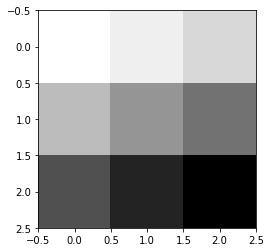

In [32]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap='Greys')

# shape = (1, 3, 3, 1)
# 여기서 3, 3, 1은 3 by 3의 이미지를 가지며 색상은 1개임을 의미함
# shape[0]은 몇개의 이미지, instance를 사용할 것인지를 의미함

Image.shape :  (1, 3, 3, 1)
weight.shape :  (2, 2, 1, 1)
conv2d_img.shape :  (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


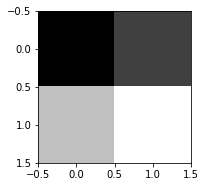

In [33]:
# 1개의 filter 사용 (padding : valid)
print("Image.shape : ", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1,]], [[1.]]]])
print("weight.shape : ", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape : ", conv2d_img.shape)

# the shape of weight = (2, 2, 1, 1)
# 여기서 shape[0:2]는 가중치의 크기를 의미하며 shape[2]는 색상, shape[3]의 경우 filter의 수를 의미
# conv2d_img의 그림
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

image.shape :  (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape :  (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


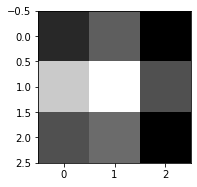

In [34]:
# 1개의 filter를 사용 (padding = SAME ==> stride가 1을 기준으로 
# convolution layer를 통과 했을 때 원래 이미지의 크기가 변하지 않도록 한다.)
print("image.shape : ", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding = 'SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape : ", conv2d_img.shape)

# 이미지 출력
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape :  (2, 2, 1, 3)
conv2d_img.shape :  (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


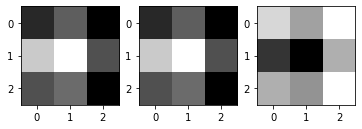

In [36]:
# 여러개의 filter
print("image.shape", image.shape)
weight = tf.constant([[[[1., 10., -1. ]], [[1., 10., -1.]]],
                      [[[1., 10., -1. ]], [[1., 10., -1.]]]])
print("weight.shape : ", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape : ", conv2d_img.shape)

# 이미지 출력
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [19]:
# Max pooling
image = np.array([[[[4], [3]],
                   [[2], [1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


In [24]:
# SAME padding : Zero padding
image = np.array([[[[4], [3]],
                   [[2], [1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [25]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


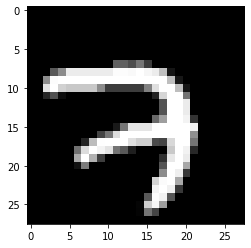

In [27]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap = "gray")

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_7:0", shape=(1, 14, 14, 5), dtype=float32)


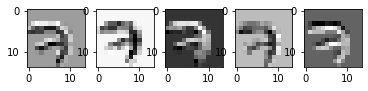

In [28]:
sess = tf.InteractiveSession()

img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME') # 결과가 원래 이미지의 반으로 감소
print(conv2d)

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_3:0", shape=(1, 7, 7, 5), dtype=float32)


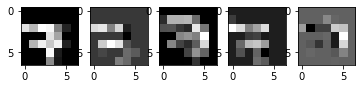

In [29]:
pool = tf.nn.max_pool(conv2d, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'SAME')
print(pool)
sess.run(tf.global_variables_initializer())

# 그림을 그림
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

# CNN using Neural Network

In [59]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)
tf.reset_default_graph()

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

learning_rate = 0.001
trainint_epochs = 15
batch_size = 100

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [60]:
learning_rate = 0.002
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1]) # img = 28 * 28 * 1 (black / white)
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # 32 filter
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding = 'SAME') # shape : (?, 28, 28, 32)
L1 = tf.nn.relu(L1) # shape : (?, 28, 28, 32)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME") # shape : (?, 14, 14, 32)

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64]))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') # shape : (?, 14, 14, 64)
L2 = tf.nn.relu(L2) # shape : (?, 14, 14, 64)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME") # shape : (?, 7, 7, 64)
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

# Connecte Output layer
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(L2_flat, W3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels=tf.stop_gradient(Y)))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [57]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(training_epochs):
        avg_cost = 0
        for iteration in range(int(mnist.train.num_examples / batch_size)):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += c / int(mnist.train.num_examples / batch_size)
        print(f'Epoch : {(epoch + 1):04d}, Cost : {avg_cost:.9f}')

    print("Accuracy : ", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction : ", sess.run(tf.argmax(logits, 1), feed_dict={X:mnist.test.images[r:r+1]}))

Epoch : 0001, Cost : 0.147895171
Epoch : 0002, Cost : 0.050969313
Epoch : 0003, Cost : 0.036825838
Epoch : 0004, Cost : 0.029246625
Epoch : 0005, Cost : 0.024478954
Epoch : 0006, Cost : 0.022657330
Epoch : 0007, Cost : 0.022328700
Epoch : 0008, Cost : 0.017151612
Epoch : 0009, Cost : 0.019386135
Epoch : 0010, Cost : 0.017528250
Epoch : 0011, Cost : 0.013671216
Epoch : 0012, Cost : 0.014117271
Epoch : 0013, Cost : 0.017552494
Epoch : 0014, Cost : 0.011744360
Epoch : 0015, Cost : 0.008889206
Accuracy :  0.986
Label :  [1]
Prediction :  [1]


# CNN using Deep Neural Network

In [91]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()
tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

learning_rate = 0.001
training_epochs = 25
batch_size = 100
num_iteration = int(mnist.test.num_examples / batch_size)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [92]:
keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding = 'SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'SAME')
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = tf.stop_gradient(Y)))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [93]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(training_epochs):
        avg_cost = 0
        for iteration in range(num_iteration):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([train, cost], feed_dict={X:batch_xs, Y:batch_ys, keep_prob : 0.7})
            avg_cost += c / num_iteration
        print(f'Epoch : {(epoch + 1):04d}, Cost : {avg_cost:.9f}')

    print("Accuracy : ", sess.run(accuracy, feed_dict={X:mnist.test.images, Y: mnist.test.labels, keep_prob : 1}))

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction : ", sess.run(tf.argmax(logits, 1), feed_dict={X:mnist.test.images[r:r+1], keep_prob : 1}))

Epoch : 0001, Cost : 1.440961159
Epoch : 0002, Cost : 0.256067003
Epoch : 0003, Cost : 0.161719642
Epoch : 0004, Cost : 0.135966410
Epoch : 0005, Cost : 0.123445672
Epoch : 0006, Cost : 0.098278776
Epoch : 0007, Cost : 0.101357414
Epoch : 0008, Cost : 0.085304600
Epoch : 0009, Cost : 0.080038181
Epoch : 0010, Cost : 0.075864202
Epoch : 0011, Cost : 0.079181165
Epoch : 0012, Cost : 0.062647094
Epoch : 0013, Cost : 0.060757648
Epoch : 0014, Cost : 0.058838536
Epoch : 0015, Cost : 0.059903023
Epoch : 0016, Cost : 0.058421222
Epoch : 0017, Cost : 0.053092669
Epoch : 0018, Cost : 0.048085225
Epoch : 0019, Cost : 0.045915833
Epoch : 0020, Cost : 0.049190577
Epoch : 0021, Cost : 0.044465193
Epoch : 0022, Cost : 0.045555994
Epoch : 0023, Cost : 0.041263817
Epoch : 0024, Cost : 0.043625107
Epoch : 0025, Cost : 0.045243514
Accuracy :  0.9909
Label :  [2]
Prediction :  [2]


# CNN using Deep Neural Network and class

In [103]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()
tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIS_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 20
batch_size = 100

Extracting MNIS_data/train-images-idx3-ubyte.gz
Extracting MNIS_data/train-labels-idx1-ubyte.gz
Extracting MNIS_data/t10k-images-idx3-ubyte.gz
Extracting MNIS_data/t10k-labels-idx1-ubyte.gz


In [104]:
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.keep_prob = tf.placeholder(tf.float32)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])
            # img 28x28x1 (black/white)
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # L1 ImgIn shape=(?, 28, 28, 1)
            W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
            #    Conv     -> (?, 28, 28, 32)
            #    Pool     -> (?, 14, 14, 32)
            L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)

            # L2 ImgIn shape=(?, 14, 14, 32)
            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            #    Conv      ->(?, 14, 14, 64)
            #    Pool      ->(?, 7, 7, 64)
            L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)

            # L3 ImgIn shape=(?, 7, 7, 64)
            W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            #    Conv      ->(?, 7, 7, 128)
            #    Pool      ->(?, 4, 4, 128)
            #    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
            L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                                1, 2, 2, 1], padding='SAME')
            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)
            L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

            # L4 FC 4x4x128 inputs -> 625 outputs
            W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)

            # L5 Final FC 625 inputs -> 10 outputs
            W5 = tf.get_variable("W5", shape=[625, 10],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(L4, W5) + b5

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, keep_prop = 1.0):
        return self.sess.run(self.logits, feed_dict={self.X:x_test, self.keep_prob: keep_prop})

    def get_accuracy(self, x_test, y_test, keep_prop = 1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X:x_test, self.Y:y_test, self.keep_prob:keep_prop})

    def train(self, x_data, y_data, keep_prop = 0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X:x_data, self.Y:y_data, self.keep_prob:keep_prop})

In [105]:
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(num_iteration):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / num_iteration
    print(f'Epoch : {(epoch + 1):04d}, Cost : {avg_cost:.9f}')

print("Accuracy : ", m1.get_accuracy(mnist.test.images, mnist.test.labels))

Epoch : 0001, Cost : 1.281994416
Epoch : 0002, Cost : 0.334959801
Epoch : 0003, Cost : 0.243120451
Epoch : 0004, Cost : 0.200942824
Epoch : 0005, Cost : 0.189983655
Epoch : 0006, Cost : 0.161294299
Epoch : 0007, Cost : 0.142128542
Epoch : 0008, Cost : 0.135564045
Epoch : 0009, Cost : 0.123546438
Epoch : 0010, Cost : 0.121430653
Epoch : 0011, Cost : 0.116429376
Epoch : 0012, Cost : 0.103125114
Epoch : 0013, Cost : 0.101518425
Epoch : 0014, Cost : 0.088797020
Epoch : 0015, Cost : 0.102861334
Epoch : 0016, Cost : 0.084380104
Epoch : 0017, Cost : 0.085341140
Epoch : 0018, Cost : 0.084293180
Epoch : 0019, Cost : 0.079779913
Epoch : 0020, Cost : 0.077213667
Accuracy :  0.9891


# CNN using layers (High API)

In [171]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()
tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [172]:
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            self.training = tf.placeholder(tf.bool)

            self.X = tf.placeholder(tf.float32, [None, 784])
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], padding='SAME', strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1, rate=0.3, training=self.training)

            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], padding='SAME', strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2, rate=0.3, training=self.training)

            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], padding='SAME', strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3, rate=0.3, training=self.training)

            flat = tf.reshape(dropout3, [-1, 4 * 4 * 128])
            dense4 = tf.layers.dense(inputs=flat, units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4, rate=0.5, training = self.training)

            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.logits, labels=tf.stop_gradient(self.Y)))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)

        prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

    def predict(self, x_test, training = False):
        return self.sess.run(self.logits, feed_dict={self.X:x_test, self.training:training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X:x_data, self.Y:y_data,
                                                                 self.training:training})
        
    def get_accuracy(self, x_test, y_test, training = False):
        return self.sess.run(self.accuracy, feed_dict={self.X:x_test, self.Y:y_test, self.training:training})

In [173]:
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Epoch: 0001 cost = 0.284124649
Epoch: 0002 cost = 0.087105827
Epoch: 0003 cost = 0.067764391
Epoch: 0004 cost = 0.055683233
Epoch: 0005 cost = 0.048758768
Epoch: 0006 cost = 0.044815487
Epoch: 0007 cost = 0.039679156
Epoch: 0008 cost = 0.039339072
Epoch: 0009 cost = 0.035314631
Epoch: 0010 cost = 0.032927454
Epoch: 0011 cost = 0.032738550
Epoch: 0012 cost = 0.030780984
Epoch: 0013 cost = 0.029694547
Epoch: 0014 cost = 0.026784180
Epoch: 0015 cost = 0.026619663
Accuracy: 0.9938


# CNN using ensemble layers

In [174]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()
tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

learning_rate = 0.001
training_epochs = 20
batch_size = 100
num_iteration = int(mnist.train.num_examples / batch_size)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [175]:
# Model은 위의 Model을 사용함
sess = tf.Session()
models = []
num_model = 5
for m in range(num_model):
    models.append(Model(sess, 'model' + str(m)))
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    for i in range(num_iteration):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        # 각각의 모델에 batch size의 크기만큼 학습시킴
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / num_iteration
    print(f"Epoch : {(epoch + 1):04d}, Cost : {avg_cost_list}")

test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10]) # 전체 test 데이터에 대한 예측 값을 저장하기 위한 list
for m_idx, m in enumerate(models):
    print(m_idx, "Accuracy : ", m.get_accuracy(mnist.test.images, mnist.test.labels)) # 각 모델 별 정확도를 출력
    p = m.predict(mnist.test.images) # 각 모델에서 전체 test 데이터에 대한 예측 값을 얻음
    predictions += p # 각 모델별 예측 값을 더함

# 각 모델이 예측 한 값을 더한 값과 실제 정답을 비교하여 정확도 출력 (전체 데이터에 대한 비교)
ensemble_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(tf.cast(ensemble_prediction, tf.float32))
print("Essenble accuracy : ", sess.run(ensemble_accuracy))

Epoch : 0001, Cost : [0.28412465 0.29327953 0.29398887 0.27907365 0.2753738 ]
Epoch : 0002, Cost : [0.08710583 0.08939244 0.08957746 0.08763186 0.0858154 ]
Epoch : 0003, Cost : [0.06776439 0.06581889 0.06617972 0.06732335 0.06527053]
Epoch : 0004, Cost : [0.05568323 0.05677869 0.05879028 0.05579991 0.05285435]
Epoch : 0005, Cost : [0.04875877 0.05189538 0.04880372 0.04856668 0.04963607]
Epoch : 0006, Cost : [0.04481549 0.04522003 0.04404167 0.04357754 0.04381947]
Epoch : 0007, Cost : [0.03967916 0.04498297 0.04214974 0.04227175 0.04077431]
Epoch : 0008, Cost : [0.03933907 0.03897136 0.03922857 0.03586223 0.03823296]
Epoch : 0009, Cost : [0.03531463 0.03854457 0.03467058 0.03435006 0.03545501]
Epoch : 0010, Cost : [0.03292745 0.03351145 0.03381976 0.03215078 0.03326423]
Epoch : 0011, Cost : [0.03273855 0.03264873 0.03136782 0.03158523 0.032063  ]
Epoch : 0012, Cost : [0.03078098 0.03125525 0.02875443 0.03201185 0.03148805]
Epoch : 0013, Cost : [0.02969455 0.03008401 0.02902766 0.0289759